In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
df=pd.read_csv('Dataset.csv')
df.columns=['ID', 'Fav_food','Gender','Fav_food_names', 'Fav_food_prce','Monthly_budget', 'Fav_environment', 'Fav_food_in_season', 'Food_flavor','fav_restaurant','Restaurant_loc',
    'Fav_food_rainy_season', 'Food_quality', 'No_of_time_month_delivery', 'No_of_time_month_goes' ]
df

,ID,Fav_food,Gender,Fav_food_names,Fav_food_prce,Monthly_budget,Fav_environment,Fav_food_in_season,Food_flavor,fav_restaurant,Restaurant_loc,Fav_food_rainy_season,Food_quality,No_of_time_month_delivery,No_of_time_month_goes
0,151340980,any,Male,burger,200,500,eating in a restaurant,eating rice in any time,Spicy,takeout,dhanmondi,khichuri,environment,0,20
1,151340981,sea food,Male,chicken fry,40-70 taka,300,eating in a restaurant,many kinds of curry,Spicy,takeout,"many outlets in dhaka,i go to dhanmondi",hot tea,food_quality,0,2/1/2019 0:00
2,151340982,Burger,Female,Burger,1000,200,eating in a restaurant,cold drink/coffee/pickels,Sweet,chillox,Dhanmondi,Pickels,food_quality,0,2
3,151340983,Biriyani,Male,Kacchi,180,2000,eating in a restaurant,"cold coffee, khichuri",Spicy,pabulum,shantinagor,khichudi,food_quality,5,3
4,151340984,Biriyani,Male,Kacchi,200-280,2000,eating in a restaurant,Kacchi/Grill/Khichuri,Spicy,Cafe Darbar,Dhanmondi,Khichuri,food_quality,0,20
5,151340985,Any,Male,anything that tastes good,400,2000,Home delivery,anything that tastes good,Spicy,sultans dine,dhanmondi,khichuri,food_quality,10,10
6,151340986,Biriyani,Male,Biriyani,150,300,eating in a restaurant,"Mango,Biriyani,Biriyani",Spicy,Amzad mamar chayer dokan,Aust,Biriyani,food_quality,0,2
7,151340988,Chicken,Female,burger,350,1000,Home delivery,burger,Spicy,burgerlab,basundhara,khichuri,environment,4,6
8,151340990,khichuri,Female,burger,150,300,eating in a restaurant,khichuri,Sweet,appeliano,khilgao,khichuri,food_quality,1,5
9,151340991,Fast Food,Female,Burger,250,1000,eating in a restaurant,fruits/soup/khichuri,Spicy,Chillox,Dhanmondi,Khichuri,food_quality,3,6


In [17]:
fd = df[[ 'Fav_food_in_season','Monthly_budget', 'Food_flavor']]
fd

,Fav_food_in_season,Monthly_budget,Food_flavor
0,eating rice in any time,500,Spicy
1,many kinds of curry,300,Spicy
2,cold drink/coffee/pickels,200,Sweet
3,"cold coffee, khichuri",2000,Spicy
4,Kacchi/Grill/Khichuri,2000,Spicy
5,anything that tastes good,2000,Spicy
6,"Mango,Biriyani,Biriyani",300,Spicy
7,burger,1000,Spicy
8,khichuri,300,Sweet
9,fruits/soup/khichuri,1000,Spicy


In [18]:
fd['Food_flavor'] = fd['Food_flavor'].astype('category')
fd.Food_flavor = fd.Food_flavor.cat.rename_categories([0,1])
fd['Fav_food_in_season'] = pd.factorize(df['Fav_food_in_season'])[0] + 1
fd

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Fav_food_in_season,Monthly_budget,Food_flavor
0,1,500,0
1,2,300,0
2,3,200,1
3,4,2000,0
4,5,2000,0
5,6,2000,0
6,7,300,0
7,8,1000,0
8,9,300,1
9,10,1000,0


In [24]:
D=fd.values
# Get the labelled set
c1=D[:20,:]; c2=D[30:50,:];  c3=D[60:70,:]
trainSet = np.concatenate((c1,c2,c3),axis=0)

# Get the testing set
c1 = D[20:30,:]; c2=D[50:60,:];  c3=D[70:,:]
testSet = np.concatenate((c1,c2,c3),axis=0)

print(trainSet.shape)
print(testSet.shape)

xTrain=trainSet[:,:-1]; yTrain=trainSet[:,-1]
xTest=testSet[:,:-1]; yTest=testSet[:,-1]


(50, 3)
(35, 3)


In [25]:
# create a knn classifier with K=3
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(xTrain, yTrain.astype(int))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [26]:
# Make predictions
yPred=clf.predict(xTest)
acc=accuracy_score(yTest.astype(int), yPred.astype(int))
print('Accuracy with 3 neighbours: ',acc)

Accuracy with 3 neighbours:  0.7142857142857143


In [27]:
def plot_conf_mat(lTrue, lPred, title):
    """ A function for plotting the confusion matrix given true and predicted labels."""
    cm = confusion_matrix(lTrue.astype(int), lPred.astype(int))
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()  

[[22  4]
 [ 6  3]]


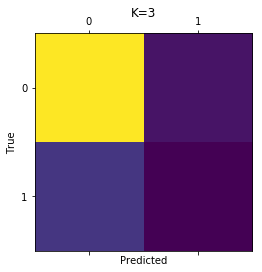

In [28]:
plot_conf_mat(yTest, yPred, 'K=3')